<a href="https://colab.research.google.com/github/SanuKumar4245/DR/blob/main/DR_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetic Retinopathy Classification Model

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from google.colab import drive

In [21]:
drive.mount('/content/drive')
dataset_dir = '/content/drive/MyDrive/Dataset'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Setting the image and batch size

In [22]:
img_width, img_height = 224, 224
batch_size = 32

## Create data generators with data augmentaiton for training and validation data

In [23]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_data_dir = dataset_dir + '/Train'
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=batch_size,
                                                    class_mode='categorical')

test_data_dir = dataset_dir + '/Test'
validation_generator = test_datagen.flow_from_directory(test_data_dir,
                                                        target_size=(img_width, img_height),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')


Found 750 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


## Plotting the Images with their labels

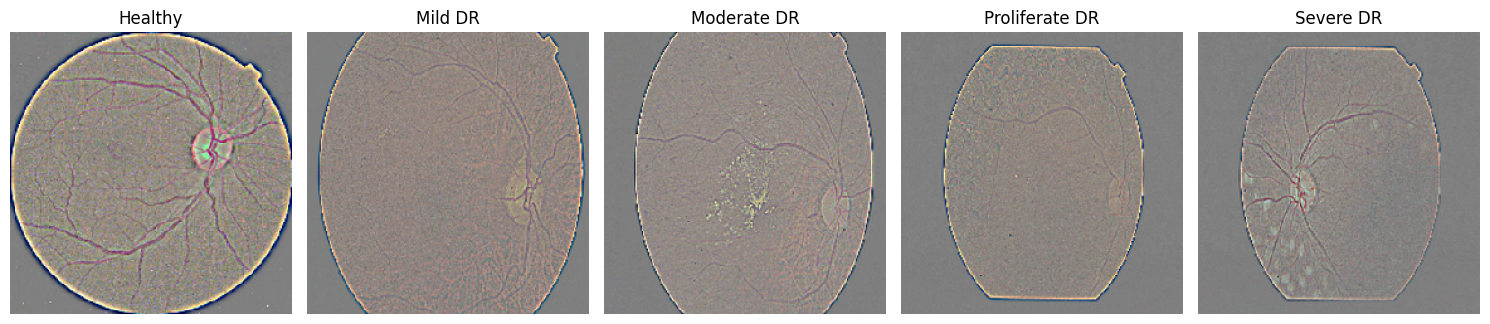

In [24]:
import matplotlib.pyplot as plt
import os
import random
from tensorflow.keras.preprocessing import image
num_images_per_class = 1

class_indices = validation_generator.class_indices
class_labels = list(class_indices.keys())

fig, axes = plt.subplots(nrows=num_images_per_class, ncols=len(class_labels), figsize=(15, 5))

for i, label in enumerate(class_labels):
    class_dir = os.path.join(test_data_dir, label)

    image_files = os.listdir(class_dir)

    selected_image = random.choice(image_files)

    img_path = os.path.join(class_dir, selected_image)
    img = image.load_img(img_path, target_size=(img_width, img_height))
    ax = axes[i]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(label)

plt.tight_layout()

plt.show()

## Selecting VGG16 as the pre-trained model

In [25]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


## Freezing the trainable parameters of the base model

In [26]:
for layer in base_model.layers:
    layer.trainable = False


## Creating a new model with VGG16 as the base model

In [27]:
model = Sequential()
model.add(base_model)
model.add(Flatten())


model.add(Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))  


model.add(Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))  


model.add(Dense(5, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

epochs = 20
history=model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=epochs,
          validation_data=validation_generator,
          validation_steps=validation_generator.samples // batch_size)

Epoch 1/20
23/23 [==============================] - 21s 563ms/step - loss: 1.7471 - accuracy: 0.2437 - val_loss: 1.4049 - val_accuracy: 0.3750
Epoch 2/20
23/23 [==============================] - 11s 496ms/step - loss: 1.5176 - accuracy: 0.3050 - val_loss: 1.3351 - val_accuracy: 0.3854
Epoch 3/20
23/23 [==============================] - 11s 474ms/step - loss: 1.4115 - accuracy: 0.3830 - val_loss: 1.3062 - val_accuracy: 0.3854
Epoch 4/20
23/23 [==============================] - 11s 469ms/step - loss: 1.4499 - accuracy: 0.3510 - val_loss: 1.2841 - val_accuracy: 0.3958
Epoch 5/20
23/23 [==============================] - 11s 498ms/step - loss: 1.4128 - accuracy: 0.3747 - val_loss: 1.2739 - val_accuracy: 0.4167
Epoch 6/20
23/23 [==============================] - 12s 525ms/step - loss: 1.4259 - accuracy: 0.3524 - val_loss: 1.2893 - val_accuracy: 0.4167
Epoch 7/20
23/23 [==============================] - 12s 520ms/step - loss: 1.3749 - accuracy: 0.3886 - val_loss: 1.2916 - val_accuracy: 0.3646

## Plotting the learning curve of the model

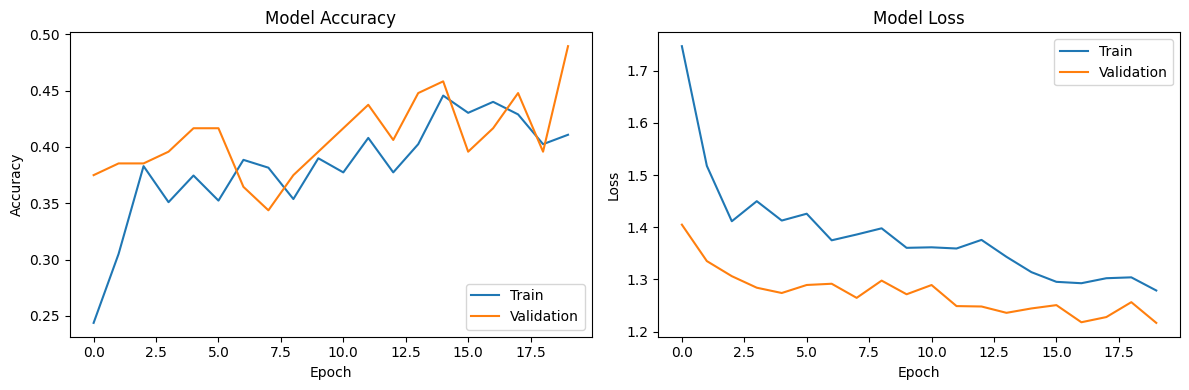

In [28]:

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()  
plt.show()









## Model Evaluation

In [29]:
class_labels = list(train_generator.class_indices.keys())
print('Class Labels:', class_labels)

test_loss, test_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


Class Labels: ['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']
3/3 [==============================] - 1s 157ms/step - loss: 1.2088 - accuracy: 0.4896
Test Loss: 1.2087761163711548
Test Accuracy: 0.4895833432674408


## Predicting the result with a random image

1/1 [==============================] - 1s 642ms/step


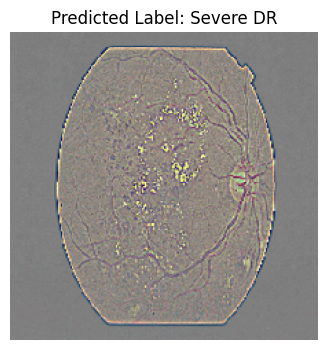

In [30]:
from tensorflow.keras.preprocessing import image

random_image_path = '/content/drive/MyDrive/Dataset/Train/Severe DR/Severe DR_108.png'

img = image.load_img(random_image_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0

predictions = model.predict(img_array)
predicted_label = class_labels[np.argmax(predictions)]

plt.figure(figsize=(4, 4))
plt.imshow(img)
plt.axis('off')
plt.title('Predicted Label: ' + predicted_label)
plt.show()




## Plotting the Confusion Matrix

Found 100 images belonging to 5 classes.
100/100 [==============================] - 1s 9ms/step


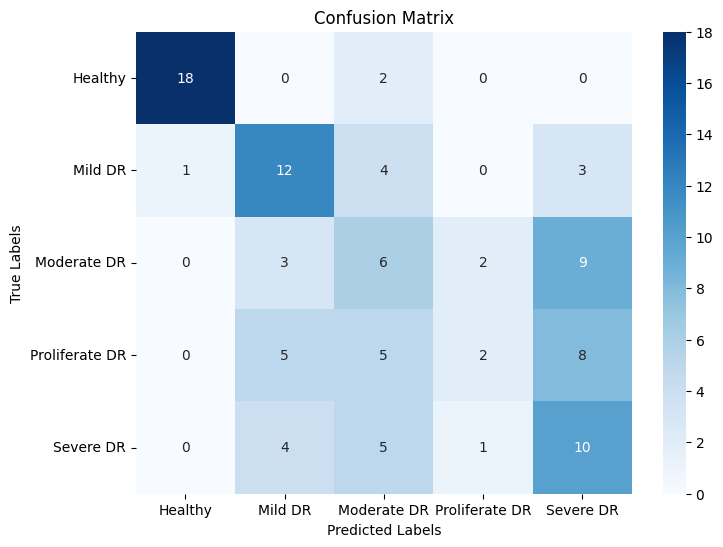

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

test_data_dir = dataset_dir + '/Test'
test_generator = test_datagen.flow_from_directory(test_data_dir,
                                                  target_size=(img_width, img_height),
                                                  batch_size=1,
                                                  shuffle=False,
                                                  class_mode='categorical')

y_pred = model.predict(test_generator)
y_true = test_generator.classes

cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



## Performance Metrics

In [32]:
import numpy as np
from sklearn.metrics import classification_report

true_labels = validation_generator.classes
predictions = model.predict(validation_generator)

predicted_labels = np.argmax(predictions, axis=1)

report = classification_report(true_labels, predicted_labels, target_names=class_labels)
print(report)

4/4 [==============================] - 2s 463ms/step
                precision    recall  f1-score   support

       Healthy       0.11      0.10      0.10        20
       Mild DR       0.25      0.30      0.27        20
   Moderate DR       0.14      0.15      0.14        20
Proliferate DR       0.00      0.00      0.00        20
     Severe DR       0.27      0.40      0.32        20

      accuracy                           0.19       100
     macro avg       0.15      0.19      0.17       100
  weighted avg       0.15      0.19      0.17       100

